<a href="https://colab.research.google.com/github/kondreddyvarshini/ML_Project/blob/main/ML_Codealpha_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.0000e+00 - loss: 3.7034 - val_accuracy: 0.0714 - val_loss: 3.8649
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.1034 - loss: 3.5748 - val_accuracy: 0.0714 - val_loss: 4.0355
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.0826 - loss: 3.5151 - val_accuracy: 0.0714 - val_loss: 4.2150
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0826 - loss: 3.5007 - val_accuracy: 0.0714 - val_loss: 4.3521
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0930 - loss: 3.4931 - val_accuracy: 0.0714 - val_loss: 4.4308
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.1034 - loss: 3.3625 - val_accuracy: 0.0714 - val_loss: 4.5199
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1053 - loss: 3.4039 - val_accuracy: 0.0714 - val_loss: 4.5049
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.1053 - loss: 3.3654 - val_accuracy: 0.0714 - val_loss: 4.5381
Epoch

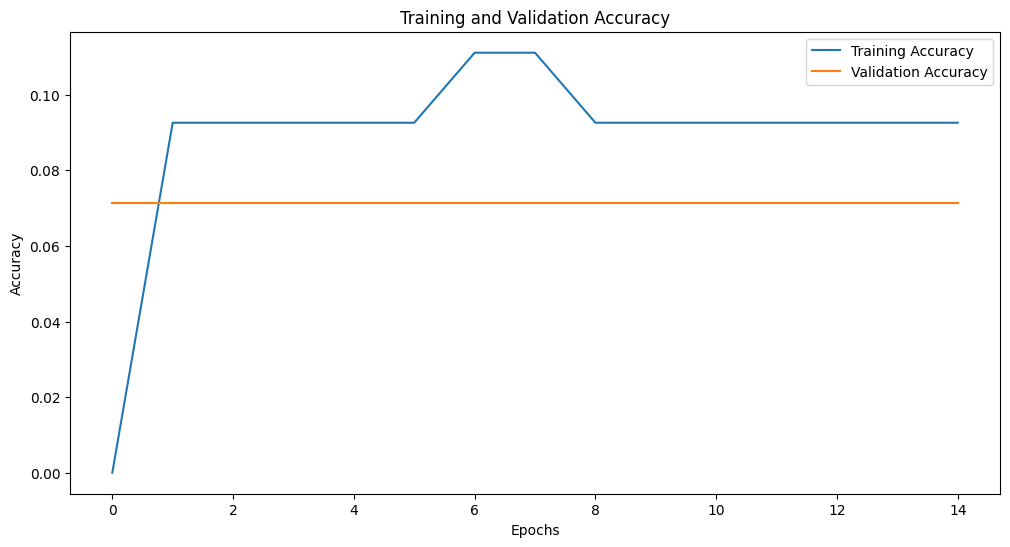

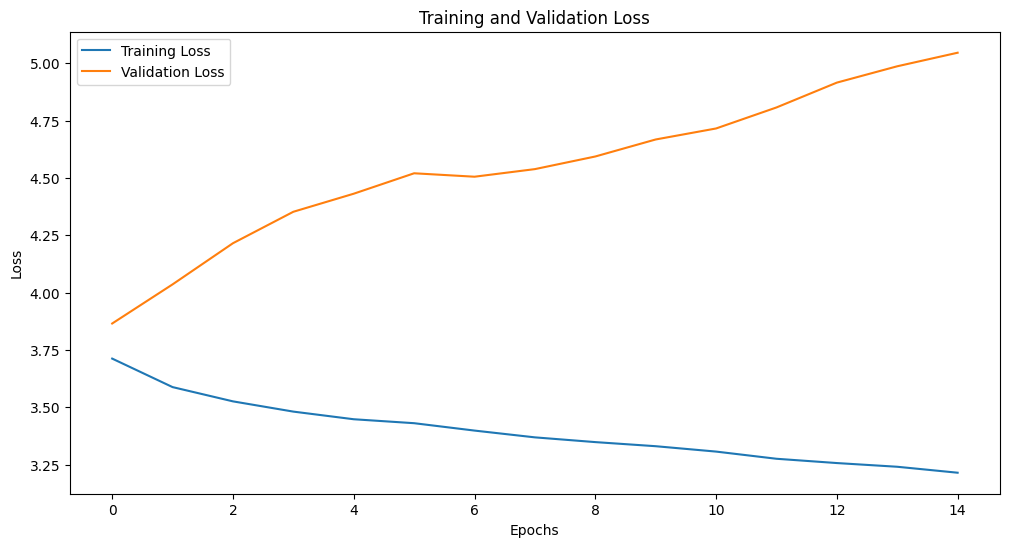

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0714 - loss: 5.0455

Test accuracy: 0.0714


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
labels_df = pd.read_csv('/content/labels.csv', header=2)
labels = labels_df['Class'].values
devnagari_chars = labels_df['Devanagari Label'].values
labels = labels.astype(str)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
def load_images():
    num_samples = len(labels)
    return np.random.rand(num_samples, 32, 32, 1)
images = load_images()
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42
)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels_encoded)), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test))
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')